In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('inputs/faces.jpg')
face_cascade = cv2.CascadeClassifier('inputs/haarcascade_frontalface_default.xml')

In [3]:
#Function for face detection.
def face_detection(img):
    image = img.copy()
    #Convert image into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Apply grayscale image to cascade classifier.
    box, detections = face_cascade.detectMultiScale2(gray, minNeighbors = 8)
    #Draw bounding box.
    for x, y, w, h in box:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        
    return image

In [4]:
## Real time face detection.
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret == False:
        break
        
    img_detect = face_detection(frame)
    cv2.imshow('Real time face detection', img_detect)
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to tar

### Face mask detection with DNN.

In [5]:
face_detection_model = cv2.dnn.readNetFromCaffe('Project_FaceDetection_with_DNN_opencv/models/deploy.prototxt.txt', 
                                               'Project_FaceDetection_with_DNN_opencv/models/res10_300x300_ssd_iter_140000_fp16.caffemodel')


In [6]:
def face_detection_dnn(img):
    blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB = True)
    #Set blob as input.
    face_detection_model.setInput(blob)
    #Get output.
    detections = face_detection_model.forward()
    #Draw bounding boxes.
    image = img.copy()
    
    h, w = image.shape[:2]
    
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            box = box.astype('int')
            pt1 = (box[0], box[1])
            pt2 = (box[2], box[3])
            
            #Draw rectangle.
            cv2.rectangle(image, pt1, pt2, (0, 255, 0), 1)
            
            text = f'Score: {confidence * 100}%'
            cv2.putText(image, text, pt1, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    return image

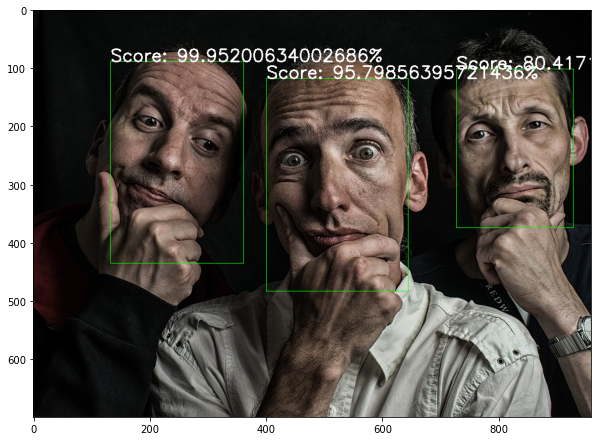

In [7]:
img_detect = face_detection_dnn(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.figure(figsize = (10, 9))
plt.imshow(img_detect)
plt.show()

In [8]:
## Real time.
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret == False:
        break
        
    img_detection = face_detection_dnn(frame)
    
    cv2.imshow('Real time face detection with DNN', img_detection)
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to target thread (0x55d4d4bff500)

QObject::moveToThread: Current thread (0x55d4d4bff500) is not the object's thread (0x55d4d4dfdbe0).
Cannot move to tar

In [9]:
img_detection.shape

(480, 640, 3)

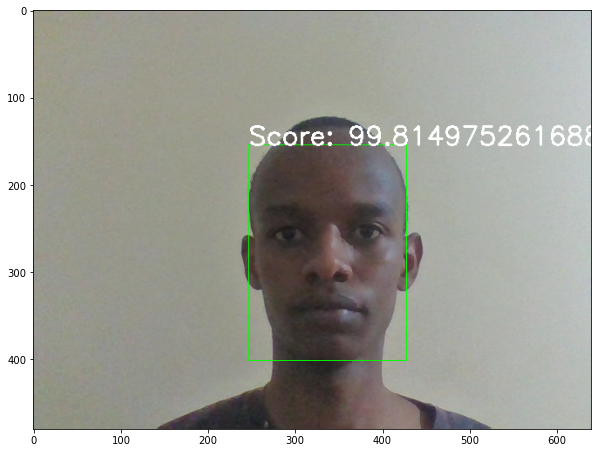

In [10]:
plt.figure(figsize = (10, 9))
plt.imshow(cv2.cvtColor(img_detection, cv2.COLOR_BGR2RGB))
plt.show()